# A simple function with different types of input parameters which are optimized.

In [6]:
from mango.tuner import Tuner

In [2]:
from scipy.stats import uniform


param_dict = {"a": uniform(0, 1), # uniform distribution
              "b": range(1,5), # Integer variable
              "c":[1,2,3], # Integer variable
              "d":["-1","1"] # Categorical variable
             }

def constraint(samples):
    is_valid = []
    for sample in samples:
        if sample['a'] < 0.5:
            v = sample['b'] >= 3
        else:
            v = sample['b'] < 3
        is_valid.append(v)
    return is_valid

# vectorized version
def constraint_vectorized(samples):
    a = np.array([s['a'] for s in samples])
    b = np.array([s['b'] for s in samples])
    return ((a < 0.5) & (b >= 3)) | ((a >= 0.5) & (b < 3))

# userObjective

In [3]:
def objectiveFunction(args_list):
    results = []
    for hyper_par in args_list:
        a = hyper_par['a']
        b = hyper_par['b']
        c = hyper_par['c']
        d = hyper_par['d']
        result = (a + b + c + int(d))
        results.append(result)
    return results

In [20]:
conf_Dict = dict()
conf_Dict['batch_size'] = 4
conf_Dict['num_iteration'] = 10
conf_Dict['constraint'] = constraint

# Defining Tuner

In [21]:
tuner_user = Tuner(param_dict, objectiveFunction,conf_Dict)

In [22]:
tuner_user.config

Tuner.Config(domain_size=50000, initial_random=2, num_iteration=10, batch_size=4, optimizer='Bayesian', parallel_strategy='clustering', surrogate=None, alpha=2.0, exploration=1.0, exploration_decay=0.9, exploration_min=0.1, fixed_domain=False, early_stopping=None, constraint=<function constraint at 0x121b39820>)

In [23]:
results = tuner_user.maximize()

  0%|          | 0/10 [00:00<?, ?it/s]

# Inspect the results

In [24]:
print('best hyper parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best hyper parameters: {'a': 0.4999748274345007, 'b': 4, 'c': 3, 'd': '1'}
best objective: 8.4999748274345


In [25]:
print('Sample hyper parameters tried:',len(results['params_tried']))
print(results['params_tried'][:2])

Sample hyper parameters tried: 42
[{'a': 0.4812707374000894, 'b': 4, 'c': 1, 'd': '1'}
 {'a': 0.15230719542234616, 'b': 4, 'c': 1, 'd': '1'}]


In [26]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 42
[6.48127074 6.1523072  7.25934913 2.9930583  3.81699046]


# Plotting the variation in objective values of the tried results

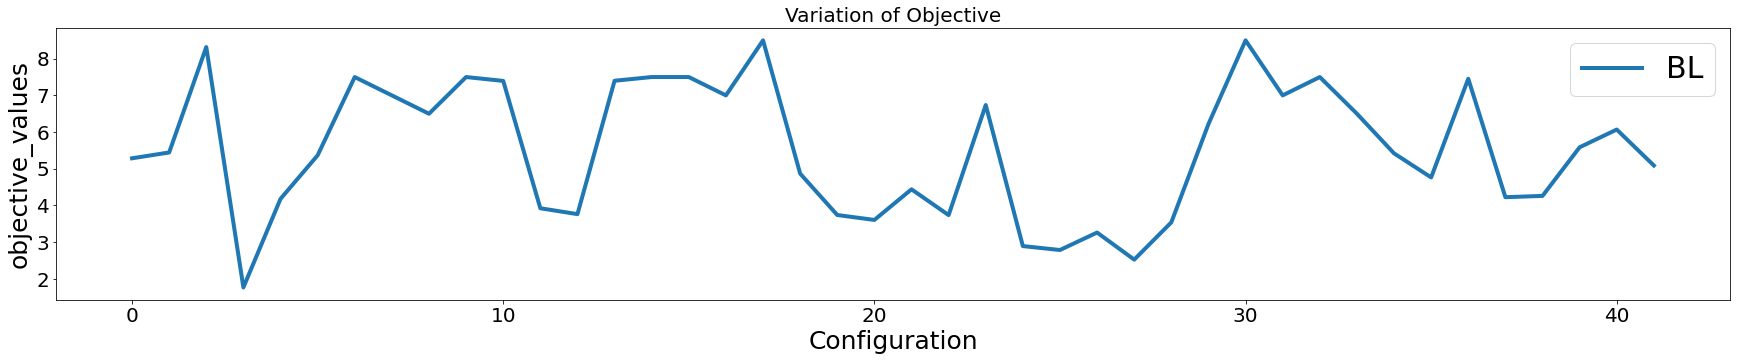

In [13]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Configuration', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

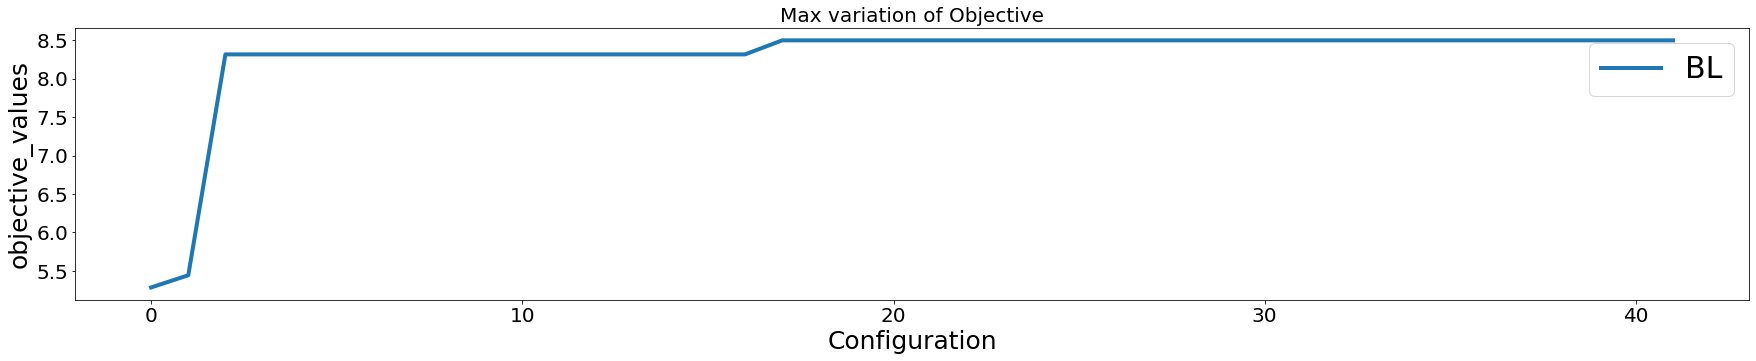

In [14]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Configuration', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the result

In [15]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_objective': 8.499921541727785,
    'best_params': {'a': 0.4999215417277847, 'b': 4, 'c': 3, 'd': '1'},
    'objective_values': array([5.28510806, 5.44376735, 8.31734197, 1.76462424, 4.17920351,
       5.36620622, 7.49968706, 6.99975849, 6.49963129, 7.49983001,
       7.39459528, 3.92318786, 3.76285709, 7.39861485, 7.49998087,
       7.49994539, 6.99991384, 8.49992154, 4.86786751, 3.73892745,
       3.60499333, 4.44005477, 3.73654818, 6.73695888, 2.89195146,
       2.78521436, 3.26136364, 2.52317202, 3.53971495, 6.21798165,
       8.49984332, 6.99998877, 7.49971951, 6.49983655, 5.41980854,
       4.76381919, 7.45336471, 4.22461605, 4.26014525, 5.58564315,
       6.0688078 , 5.08886401]),
    'params_tried': array([{'a': 0.28510806169205527, 'b': 3, 'c': 3, 'd': '-1'},
       {'a': 0.44376735015001056, 'b': 3, 'c': 1, 'd': '1'},
       {'a': 0.31734196979214024, 'b': 4, 'c': 3, 'd': '1'},
       {'a': 0.7646242448500764, 'b': 1, 'c': 1, 'd': '-1'},
       {'a': 0.17920351414407

# See the different values tried

In [ ]:
values = []

for hyper in results['params_tried']:
    val=[hyper['a'],hyper['b'],hyper['c'],int(hyper['d'])]
    values.append(val)

In [ ]:
values = np.array(values)

In [ ]:
#print(np.sort(values,axis=0))

In [ ]:
#values.shape